In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def calculate_distance_and_angle(x1, y1, x2, y2):
    distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    angle = math.atan2(y2 - y1, x2 - x1)
    angle_degrees = math.degrees(angle)
    return distance, angle_degrees

In [3]:
input_dir = 'test2'

In [4]:
origin_df = pd.read_csv(f'{input_dir}/recorded_position.csv')

probing_dfs = []
for i in range(0, 10):
    probing_dfs.append(pd.read_csv(f'{input_dir}/recorded_position_0.{i}pi.csv'))

In [5]:
# calculate the difference between the origin and the probing
max_time_step = len(origin_df)
diff_dfs = []
for probing_df in probing_dfs:
    diff_df = pd.DataFrame()
    for i, row in probing_df.iterrows():
        origin_i = i if i < max_time_step else max_time_step - 1
        diff_x0 = row['robot0_x'] - origin_df.iloc[origin_i]['robot0_x']
        diff_y0 = row['robot0_y'] - origin_df.iloc[origin_i]['robot0_y']

        diff_x1 = row['robot1_x'] - origin_df.iloc[origin_i]['robot1_x']
        diff_y1 = row['robot1_y'] - origin_df.iloc[origin_i]['robot1_y']

        diff_x2 = row['robot2_x'] - origin_df.iloc[origin_i]['robot2_x']
        diff_y2 = row['robot2_y'] - origin_df.iloc[origin_i]['robot2_y']

        diff_x3 = row['robot3_x'] - origin_df.iloc[origin_i]['robot3_x']
        diff_y3 = row['robot3_y'] - origin_df.iloc[origin_i]['robot3_y']

        # add the difference to the row
        row['diff_robot0_x'] = diff_x0
        row['diff_robot0_y'] = diff_y0
        row['diff_robot1_x'] = diff_x1
        row['diff_robot1_y'] = diff_y1
        row['diff_robot2_x'] = diff_x2
        row['diff_robot2_y'] = diff_y2
        row['diff_robot3_x'] = diff_x3
        row['diff_robot3_y'] = diff_y3
        
        diff_df = diff_df.append(row, ignore_index=True)
    diff_dfs.append(diff_df)

In [6]:
for df in diff_dfs:
    distance1_list = []
    angle1_list = []

    distance2_list = []
    angle2_list = []

    distance3_list = []
    angle3_list = []
    # iterate through the rows
    for index, row in df.iterrows():
        x0 = row['robot0_x']
        y0 = row['robot0_y']
        
        x1 = row['robot1_x']
        y1 = row['robot1_y']

        x2 = row['robot2_x']
        y2 = row['robot2_y']

        x3 = row['robot3_x']
        y3 = row['robot3_y']

        distance1, angle1 = calculate_distance_and_angle(x0, y0, x1, y1)
        distance2, angle2 = calculate_distance_and_angle(x0, y0, x2, y2)
        distance3, angle3 = calculate_distance_and_angle(x0, y0, x3, y3)

        distance1_list.append(distance1)
        angle1_list.append(angle1)

        distance2_list.append(distance2)
        angle2_list.append(angle2)

        distance3_list.append(distance3)
        angle3_list.append(angle3)

    df['distance1'] = distance1_list
    df['angle1'] = angle1_list

    df['distance2'] = distance2_list
    df['angle2'] = angle2_list

    df['distance3'] = distance3_list
    df['angle3'] = angle3_list

In [7]:
# save the difference
for i, diff_df in enumerate(diff_dfs):
    diff_df.to_csv(f'{input_dir}/diff/diff_0.{i}pi.csv', index=False)

In [8]:
diff_dfs[0]

,attack_drone_x,attack_drone_y,diff_robot0_x,diff_robot0_y,diff_robot1_x,diff_robot1_y,diff_robot2_x,diff_robot2_y,diff_robot3_x,diff_robot3_y,...,robot2_x,robot2_y,robot3_x,robot3_y,distance1,angle1,distance2,angle2,distance3,angle3
0,None,None,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.130383,0.263705,-1.981142,0.512953,0.274735,57.119214,0.288391,120.075753,0.498833,89.458364
1,None,None,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.120625,0.246247,-1.981230,0.492953,0.274332,56.158499,0.274205,116.098136,0.493310,87.819432
2,None,None,0.015051,0.025936,0.015462,-0.027952,0.030501,0.000409,0.026395,-0.014199,...,-2.105201,0.233515,-1.974307,0.474189,0.240530,57.000971,0.258911,118.659548,0.467913,89.177214
3,None,None,0.015051,0.054220,0.025793,-0.009343,0.028588,0.012766,0.029508,-0.006683,...,-2.087383,0.242600,-1.954659,0.470454,0.233063,54.049831,0.252711,118.478256,0.450153,88.443794
4,None,None,-0.005415,0.021105,0.001387,-0.013995,0.017328,-0.007668,0.011207,-0.019531,...,-2.078785,0.224542,-1.954281,0.450458,0.232369,54.818562,0.246774,115.329710,0.449363,87.585899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,1.6199105863132481,0.025814578925276385,-0.078849,0.030473,-0.038243,0.146798,0.137724,0.008898,-0.008665,0.033054,...,1.646752,-0.200834,1.369175,0.032892,0.320597,133.037531,0.322361,-136.639742,0.512100,178.612696
216,1.6398443394643092,0.026842698081878315,-0.058969,0.028291,-0.018465,0.149771,0.156970,0.014338,0.007168,0.045274,...,1.665998,-0.195394,1.385008,0.045112,0.324454,132.429416,0.317645,-137.717998,0.516693,177.026793
217,1.6585285781184642,0.031455529858912964,-0.038988,0.027409,0.000820,0.155071,0.176884,0.012479,0.021270,0.059455,...,1.685911,-0.197253,1.399111,0.059293,0.329506,131.793458,0.318353,-137.596009,0.523552,175.413690
218,1.6768489774502413,0.035640723957906656,-0.019018,0.026315,0.019958,0.160880,0.188848,0.028506,0.035113,0.073891,...,1.697876,-0.181227,1.412953,0.073728,0.335231,131.113196,0.313239,-140.897715,0.531113,173.796372


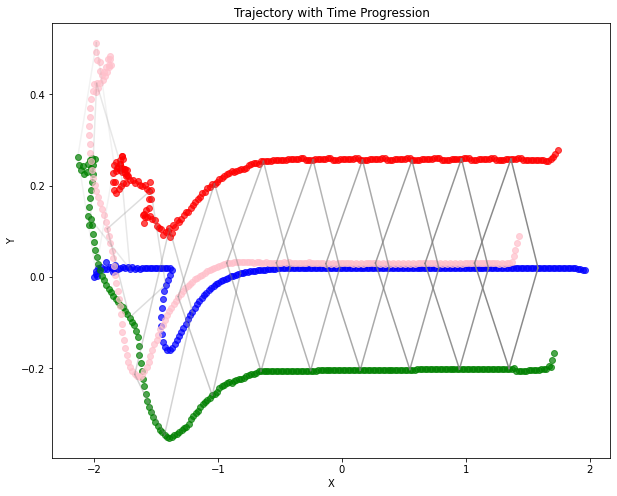

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming test_df is your DataFrame and it has columns 'robot0_x', 'robot0_y', etc.
test_df = diff_dfs[0]
x0 = test_df['robot0_x']
y0 = test_df['robot0_y']
x1 = test_df['robot1_x']
y1 = test_df['robot1_y']
x2 = test_df['robot2_x']
y2 = test_df['robot2_y']
x3 = test_df['robot3_x']
y3 = test_df['robot3_y']

time = np.arange(len(test_df))  # Create a time array

# Create an array of alpha values that increase with time
alpha_values = np.linspace(0.1, 1, len(time))  # Adjust the range as needed

plt.figure(figsize=(10, 8))  # Adjust the width and height as needed

# Create a scatter plot with varying alpha values and link points every 50 ticks
for i in range(len(x0)):
    plt.scatter(x0[i], y0[i], color='blue', alpha=0.7)
    plt.scatter(x1[i], y1[i], color='red', alpha=0.7)
    plt.scatter(x2[i], y2[i], color='green', alpha=0.7)
    plt.scatter(x3[i], y3[i], color='pink', alpha=0.7)
    
    if i % 20 == 0:
        plt.plot([x0[i], x1[i]], [y0[i], y1[i]], color='gray', alpha=alpha_values[i])
        plt.plot([x1[i], x3[i]], [y1[i], y3[i]], color='gray', alpha=alpha_values[i])
        plt.plot([x2[i], x3[i]], [y2[i], y3[i]], color='gray', alpha=alpha_values[i])
        plt.plot([x2[i], x0[i]], [y2[i], y0[i]], color='gray', alpha=alpha_values[i])

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Trajectory with Time Progression')

# Show the plot
plt.show()

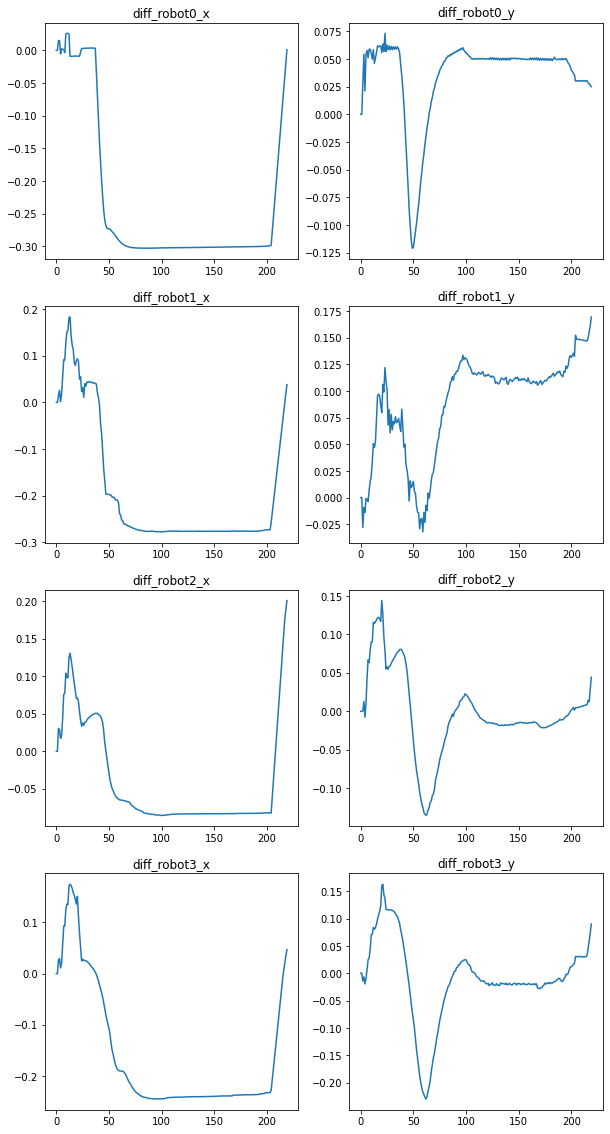

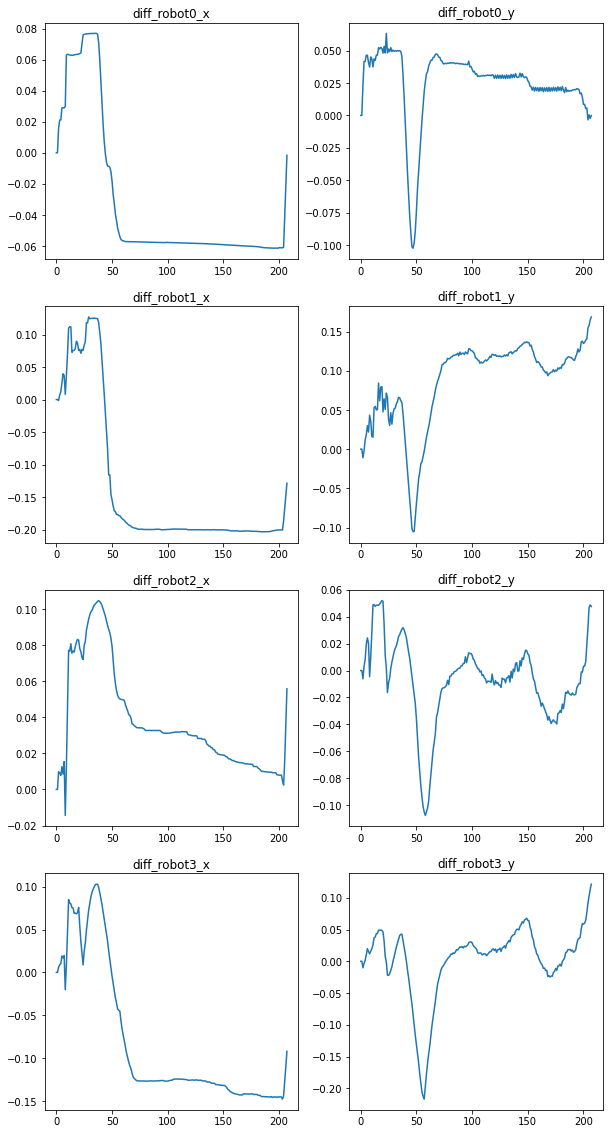

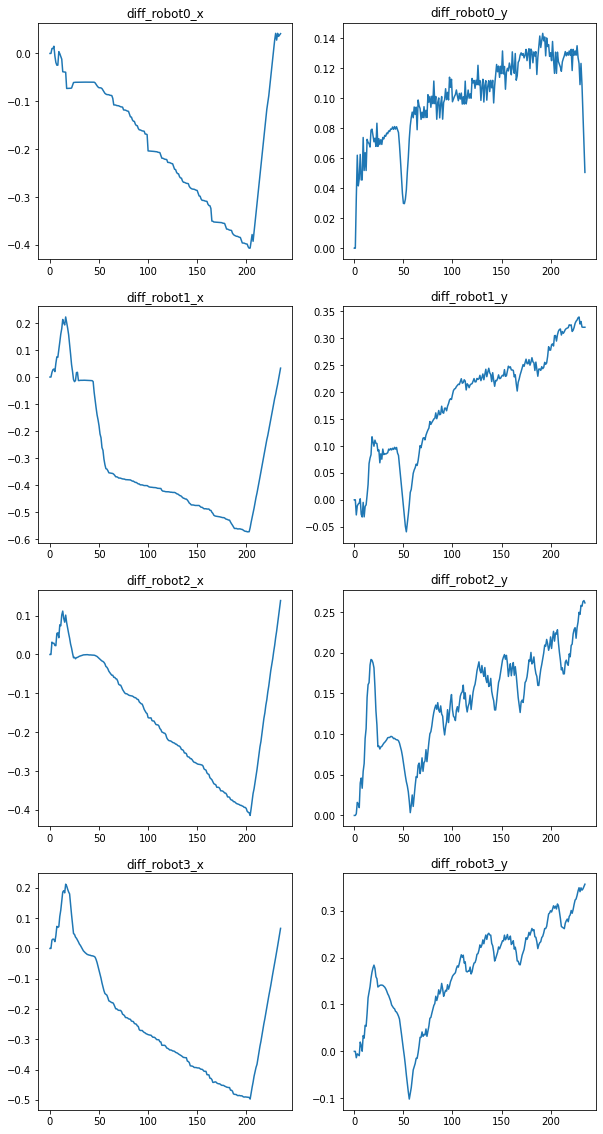

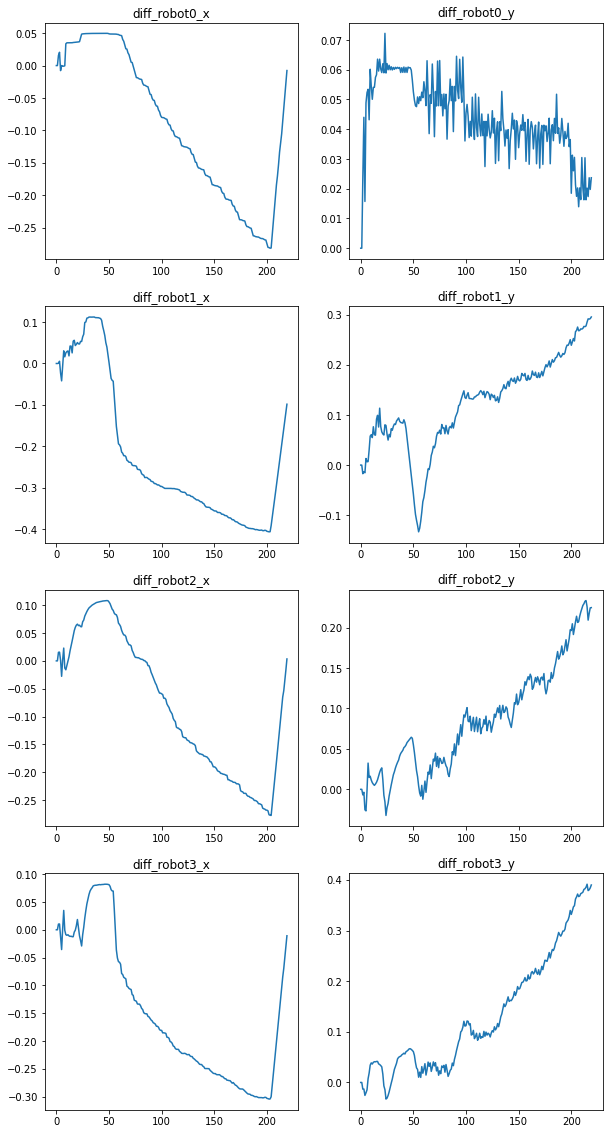

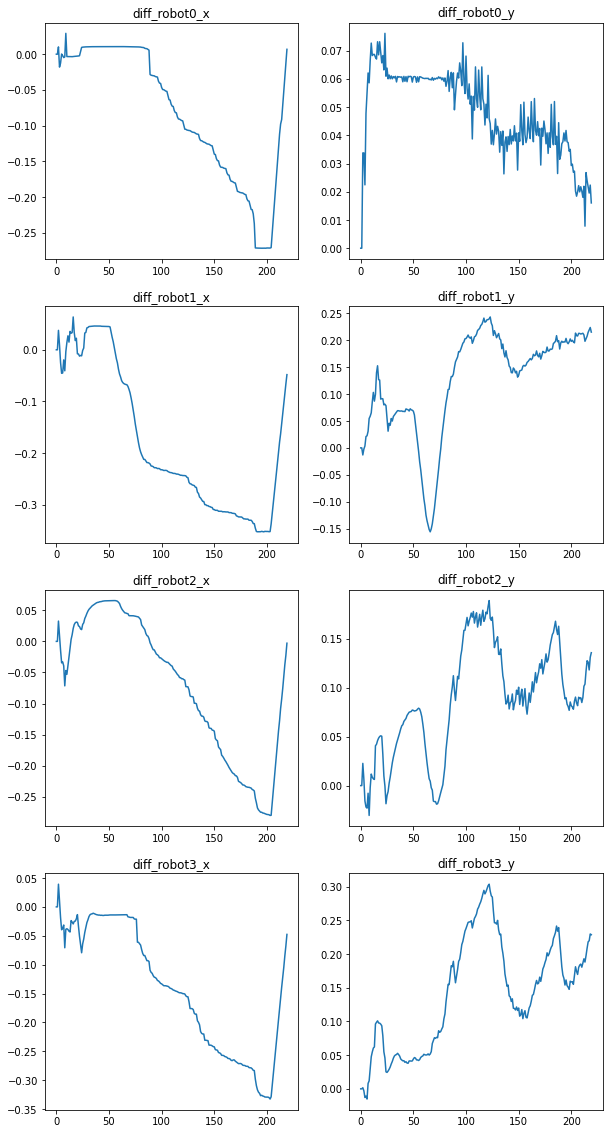

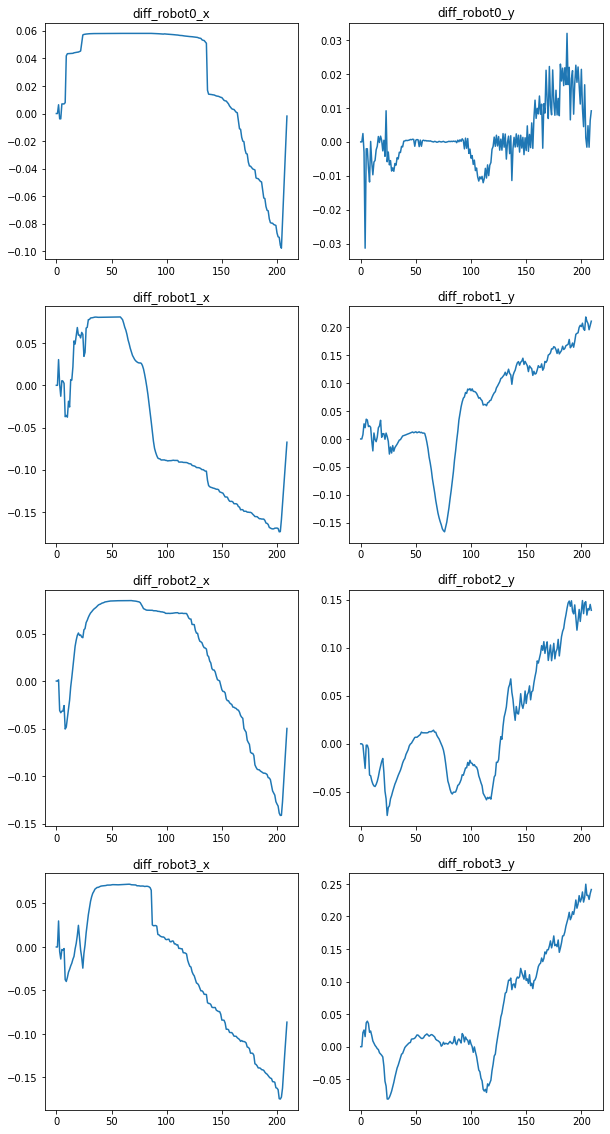

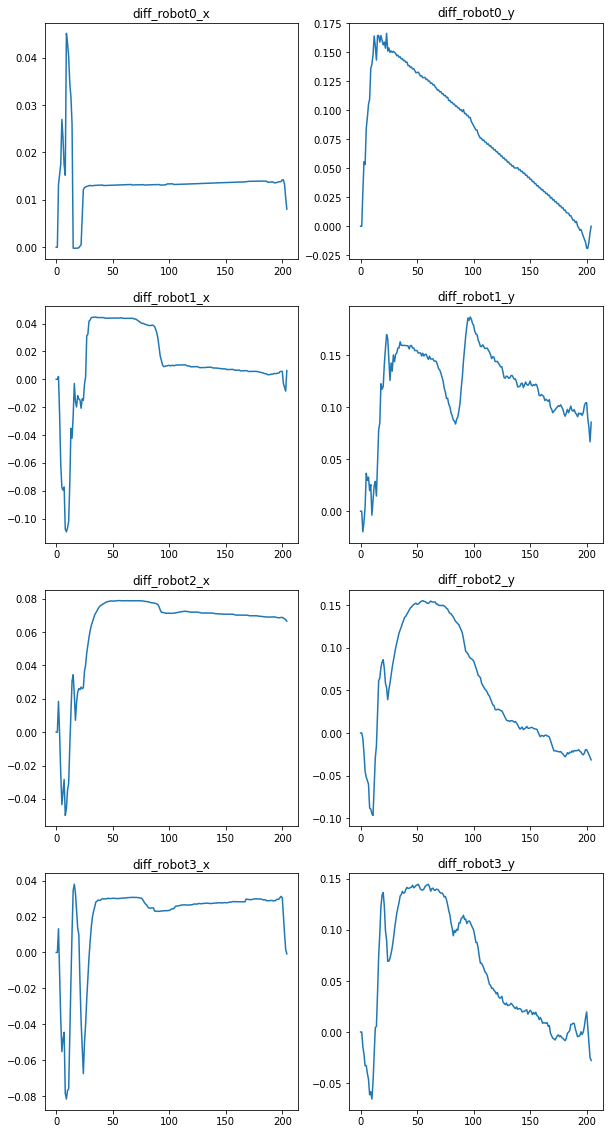

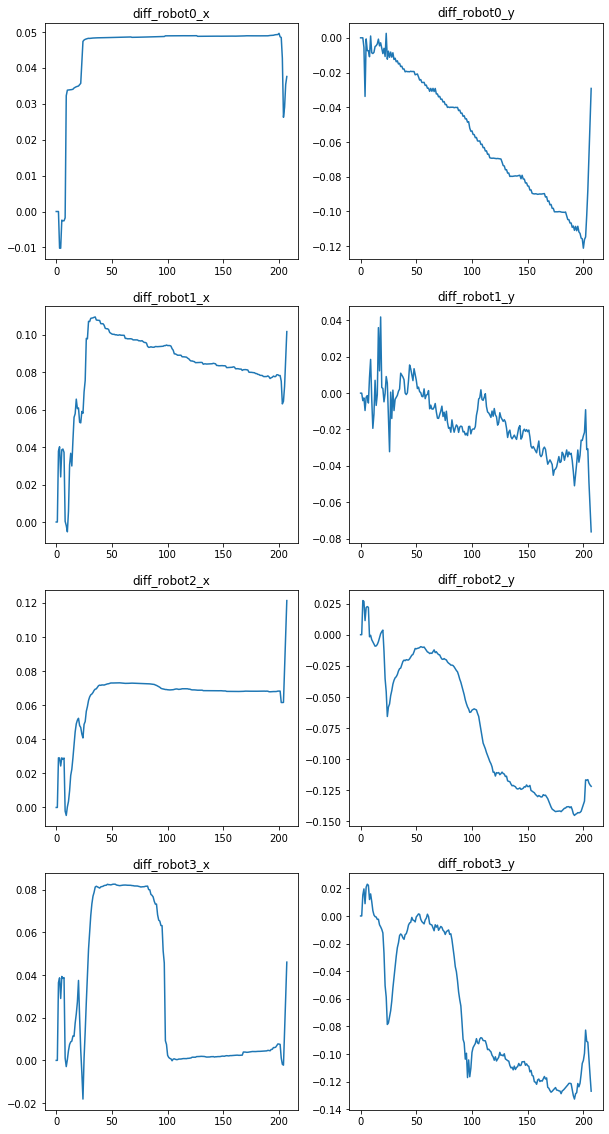

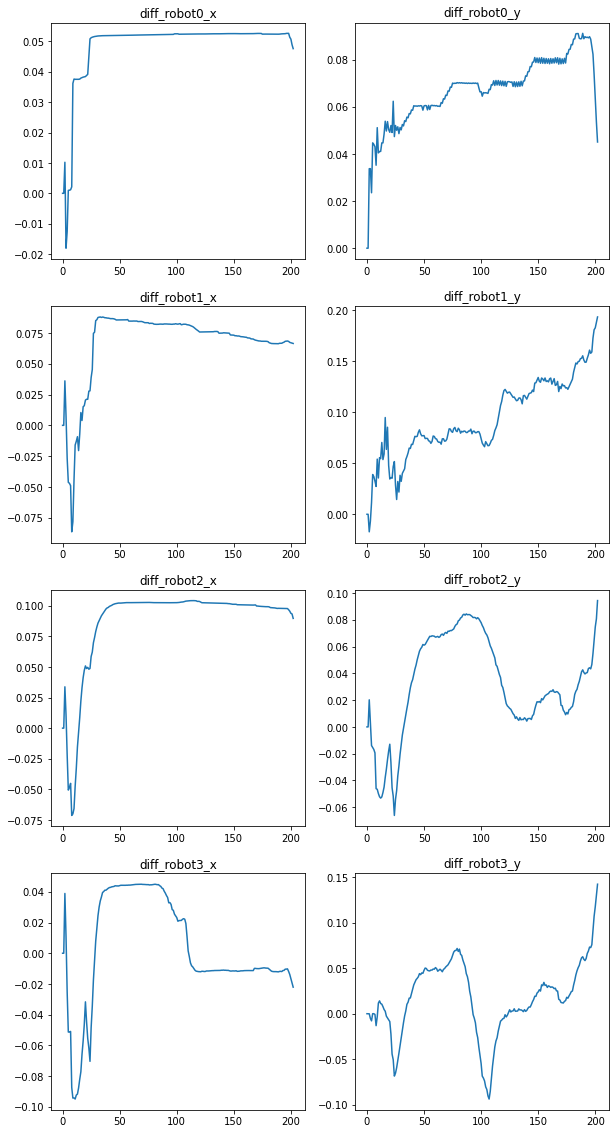

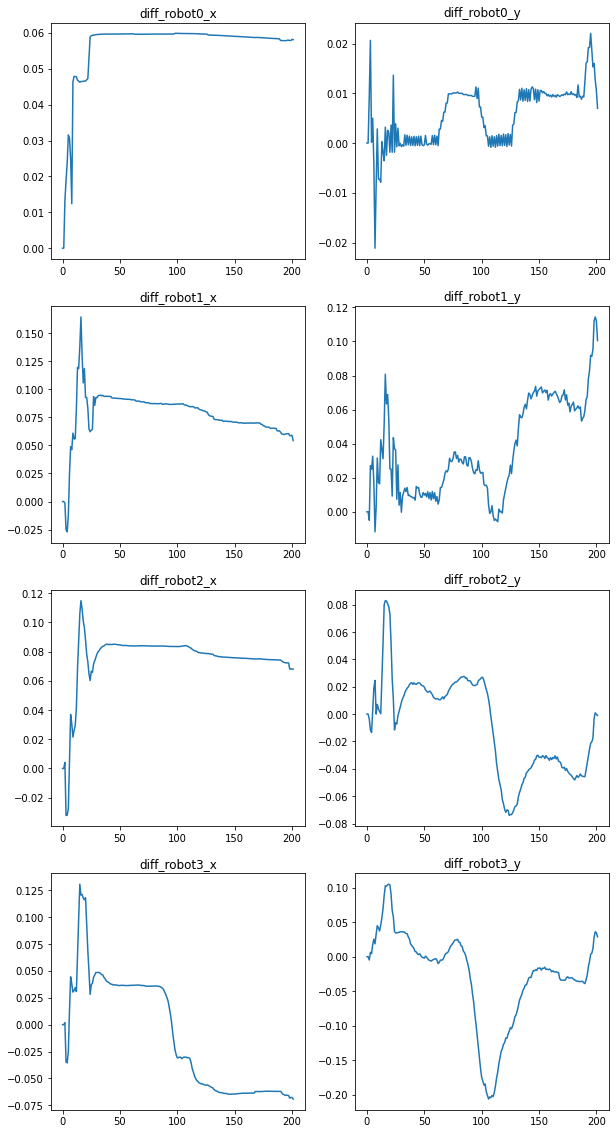

In [10]:
# visualize the difference
for test_df in diff_dfs:
    fig, axs = plt.subplots(4, 2, figsize=(10, 20))
    for i in range(4):
        axs[i, 0].plot(test_df[f'diff_robot{i}_x'])
        axs[i, 0].set_title(f'diff_robot{i}_x')
        axs[i, 1].plot(test_df[f'diff_robot{i}_y'])
        axs[i, 1].set_title(f'diff_robot{i}_y')
    plt.show()